In [2]:
# The below model can be used to find the shipment delivery of the given data set.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore')

#So the goal is to find the delivery time, instead we can predict as the shipment is deliveried in time as expected,
if the shipment is delivered as expected then we can make the output as 1 else 0 and this would give more sense becase and it's a kind of classification modle.

(i) If we are tying to estimate the delivery date we need to find out number of days based on the expected and actual delivery date and from these number of days we need to derive the delivery date of the shipment. Even though if we do this it wouldn't be that much accurate because the days can be varies as there is no singnificant weight to the "number of days" field (derived field) in the data set, so the model will take unnecessary weight on this column, this leads degrade the model accuracy.

(ii) And we are going to predict the same using different models and compare the accuracy and choose the best fit across all the models.

(iii) So we predict the output based on the model and inform the customer like it can be delivered in time or not, as per the prvlg_expected_delivery_dt which we gave in time of agreement with the customer.

In [3]:
shipment_data = pd.read_csv("E:/DataScience/DellCaseStudy/DataExternal/train.csv")
shipment_data.head()

,Sale,Quote,Segment,Order_Dt,Arrive_by_dt,Brand,Product,Ship_City,Ship_state,Paym_term,...,Qty,order_amt,deliver_dt,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt
0,937906663.0,NaN,c3976246348c686e4deca0a7e331a039,3/24/2019,NaN,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,62eb42063b4c63d18f476e5c92eafa50,2384e716112fd9418cbb48957c45bfc5,652f6b0c37563fb728f0560faac1c036,...,10,8448.009347,4/19/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,4/4/2019,4/9/2019,5/12/2019,4/9/2019
1,821969174.0,1.017820e+12,d8856a306e76cdec5c33ddb4195c185d,10/12/2018,NaN,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,ecfc435e2f1b34807f368797625785a6,40871108ac50c36ac78ef67273d247e8,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,...,1,1115.066911,10/22/2018,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,10/15/2018,10/21/2018,11/4/2018,10/21/2018
2,917089389.0,3.000090e+12,c3976246348c686e4deca0a7e331a039,2/23/2019,NaN,7d2d85b3d683840d2b6ca6eb2ca1ba0c,2ce9e0196a21cf2045c0bec59f692a5f,e0975410aeac093508e12d41f3a2bd44,2384e716112fd9418cbb48957c45bfc5,3da37128be279acdc5f6843977bdaec6,...,2,1142.849799,3/28/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,3/21/2019,3/25/2019,4/14/2019,3/29/2019
3,904932797.0,1.029690e+12,62ec0553902c09a0651064e81375217d,2/5/2019,NaN,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,8de35dfb7f96b0c4228dd9bfe4abf7aa,2384e716112fd9418cbb48957c45bfc5,19c7bb068de1fdffcb13cd2691e6088a,...,1,1574.382299,3/1/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,82f1724d93a668a5800a91973e3115f2,2/12/2019,2/25/2019,3/26/2019,2/25/2019
4,886146272.0,3.000080e+12,79238f4ec268203867a0d6847b3c2846,1/8/2019,NaN,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,b956dc64ac02f753e7549bbc660c74de,89bc8c0c87b49d3bb6f8fdb4b9bae4b0,3da37128be279acdc5f6843977bdaec6,...,2,1285.218528,4/26/2019,57dcf6017ed4410f481220ec1e135c81,c9f6ff0d507cbe7ca0ea07e4c88a1880,c9f6ff0d507cbe7ca0ea07e4c88a1880,4/9/2019,4/18/2019,3/23/2019,4/20/2019


In [4]:
shipment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355311 entries, 0 to 355310
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Sale                        355311 non-null  float64
 1   Quote                       304760 non-null  float64
 2   Segment                     355311 non-null  object 
 3   Order_Dt                    355311 non-null  object 
 4   Arrive_by_dt                3090 non-null    object 
 5   Brand                       355311 non-null  object 
 6   Product                     355311 non-null  object 
 7   Ship_City                   355311 non-null  object 
 8   Ship_state                  355311 non-null  object 
 9   Paym_term                   355311 non-null  object 
 10  sku_lead_tm                 337759 non-null  float64
 11  Qty                         355311 non-null  int64  
 12  order_amt                   355311 non-null  float64
 13  deliver_dt    

#Removing the below mentioned fields from the data set 
1. All the object type fields, as these are masked any ways and keeping the date values fields as these are needed for analysis
2. All the Prvlg fields are also removing as these fields are not giving any weight to the data set while building the model
3. And removing Arrive_by_dt fields as this fields having only few non null values and it can be considered as an optional  field untill unless the shipment is kind of urgent delivery.

In [6]:
df = shipment_data[["Sale","Quote","sku_lead_tm","Qty","order_amt","Order_Dt","prvlg_expected_delivery_dt","deliver_dt"]]
df.head()

,Sale,Quote,sku_lead_tm,Qty,order_amt,Order_Dt,prvlg_expected_delivery_dt,deliver_dt
0,937906663.0,NaN,30.0,10,8448.009347,3/24/2019,5/12/2019,4/19/2019
1,821969174.0,1.017820e+12,5.0,1,1115.066911,10/12/2018,11/4/2018,10/22/2018
2,917089389.0,3.000090e+12,30.0,2,1142.849799,2/23/2019,4/14/2019,3/28/2019
3,904932797.0,1.029690e+12,30.0,1,1574.382299,2/5/2019,3/26/2019,3/1/2019
4,886146272.0,3.000080e+12,46.0,2,1285.218528,1/8/2019,3/23/2019,4/26/2019


#If we observe in the data set all the date fields are defined as objects and we need to convert these fields in to date,
and we can achieve this as mentioned below

In [7]:
df['Ordered_Dt'] = pd.to_datetime(df['Order_Dt'])
df['Expect_Del_Dt'] = pd.to_datetime(df['prvlg_expected_delivery_dt'])
df['Actual_Del_Dt'] = pd.to_datetime(df['deliver_dt'])

In [8]:
df.head()

,Sale,Quote,sku_lead_tm,Qty,order_amt,Order_Dt,prvlg_expected_delivery_dt,deliver_dt,Ordered_Dt,Expect_Del_Dt,Actual_Del_Dt
0,937906663.0,NaN,30.0,10,8448.009347,3/24/2019,5/12/2019,4/19/2019,2019-03-24,2019-05-12,2019-04-19
1,821969174.0,1.017820e+12,5.0,1,1115.066911,10/12/2018,11/4/2018,10/22/2018,2018-10-12,2018-11-04,2018-10-22
2,917089389.0,3.000090e+12,30.0,2,1142.849799,2/23/2019,4/14/2019,3/28/2019,2019-02-23,2019-04-14,2019-03-28
3,904932797.0,1.029690e+12,30.0,1,1574.382299,2/5/2019,3/26/2019,3/1/2019,2019-02-05,2019-03-26,2019-03-01
4,886146272.0,3.000080e+12,46.0,2,1285.218528,1/8/2019,3/23/2019,4/26/2019,2019-01-08,2019-03-23,2019-04-26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355311 entries, 0 to 355310
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Sale                        355311 non-null  float64       
 1   Quote                       304760 non-null  float64       
 2   sku_lead_tm                 337759 non-null  float64       
 3   Qty                         355311 non-null  int64         
 4   order_amt                   355311 non-null  float64       
 5   Order_Dt                    355311 non-null  object        
 6   prvlg_expected_delivery_dt  355311 non-null  object        
 7   deliver_dt                  355311 non-null  object        
 8   Ordered_Dt                  355311 non-null  datetime64[ns]
 9   Expect_Del_Dt               355311 non-null  datetime64[ns]
 10  Actual_Del_Dt               355311 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64

#So in the above data set the "Quote" field is having null values and we are replacing those valeus with 0 and also we are going to remove the object date value fields as we are inclding the same fields with date data type.

In [14]:
df["Quote"] = df["Quote"].fillna(0)
df["sku_lead_tm"] = df["sku_lead_tm"].fillna(0)
df.head()

,Sale,Quote,sku_lead_tm,Qty,order_amt,Order_Dt,prvlg_expected_delivery_dt,deliver_dt,Ordered_Dt,Expect_Del_Dt,Actual_Del_Dt
0,937906663.0,0.000000e+00,30.0,10,8448.009347,3/24/2019,5/12/2019,4/19/2019,2019-03-24,2019-05-12,2019-04-19
1,821969174.0,1.017820e+12,5.0,1,1115.066911,10/12/2018,11/4/2018,10/22/2018,2018-10-12,2018-11-04,2018-10-22
2,917089389.0,3.000090e+12,30.0,2,1142.849799,2/23/2019,4/14/2019,3/28/2019,2019-02-23,2019-04-14,2019-03-28
3,904932797.0,1.029690e+12,30.0,1,1574.382299,2/5/2019,3/26/2019,3/1/2019,2019-02-05,2019-03-26,2019-03-01
4,886146272.0,3.000080e+12,46.0,2,1285.218528,1/8/2019,3/23/2019,4/26/2019,2019-01-08,2019-03-23,2019-04-26


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355311 entries, 0 to 355310
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Sale                        355311 non-null  float64       
 1   Quote                       355311 non-null  float64       
 2   sku_lead_tm                 355311 non-null  float64       
 3   Qty                         355311 non-null  int64         
 4   order_amt                   355311 non-null  float64       
 5   Order_Dt                    355311 non-null  object        
 6   prvlg_expected_delivery_dt  355311 non-null  object        
 7   deliver_dt                  355311 non-null  object        
 8   Ordered_Dt                  355311 non-null  datetime64[ns]
 9   Expect_Del_Dt               355311 non-null  datetime64[ns]
 10  Actual_Del_Dt               355311 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64

#If we observe the above data set is having same count across all the fieds and this is what we need to do 
before give the feed to the model

#Now we need to do some feature engineering by deriving a output fiels by using field 9 & 10, if df['Expect_Del_Dt'] >= df['Actual_Del_Dt'] then the shipment is considered as delivered in time and if these values are df['Expect_Del_Dt'] < df['Actual_Del_Dt'] then we can considered the Delivery might be late and keep the corresponding output field (Delivered_In_Time) as 1 or  0 accordingly.

In [22]:
conditions = [
    (df['Expect_Del_Dt'] >= df['Actual_Del_Dt']),
    (df['Expect_Del_Dt'] < df['Actual_Del_Dt'])
]

values = [1,0]

df['Delivered_In_Time'] = np.select(conditions, values)


In [23]:
df.head()

,Sale,Quote,sku_lead_tm,Qty,order_amt,Order_Dt,prvlg_expected_delivery_dt,deliver_dt,Ordered_Dt,Expect_Del_Dt,Actual_Del_Dt,Delivered_In_Time
0,937906663.0,0.000000e+00,30.0,10,8448.009347,3/24/2019,5/12/2019,4/19/2019,2019-03-24,2019-05-12,2019-04-19,1
1,821969174.0,1.017820e+12,5.0,1,1115.066911,10/12/2018,11/4/2018,10/22/2018,2018-10-12,2018-11-04,2018-10-22,1
2,917089389.0,3.000090e+12,30.0,2,1142.849799,2/23/2019,4/14/2019,3/28/2019,2019-02-23,2019-04-14,2019-03-28,1
3,904932797.0,1.029690e+12,30.0,1,1574.382299,2/5/2019,3/26/2019,3/1/2019,2019-02-05,2019-03-26,2019-03-01,1
4,886146272.0,3.000080e+12,46.0,2,1285.218528,1/8/2019,3/23/2019,4/26/2019,2019-01-08,2019-03-23,2019-04-26,0


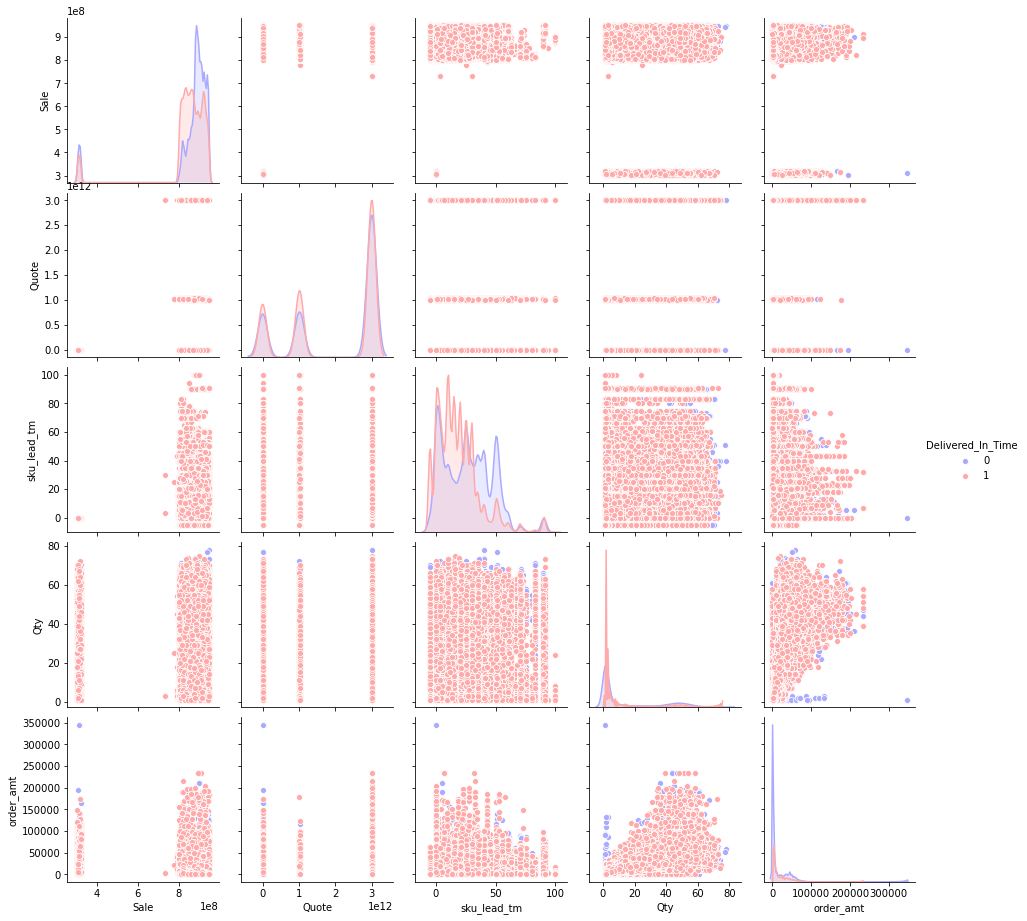

In [32]:
sns.pairplot(df,hue='Delivered_In_Time',palette='bwr')

#So till here we are good with the shape of the data including all the features, now we need to split the data as dependent and 
independent varialbles like x and y and also we need to get the independent features into the same scale and then the data should split into two parts for training and testing. And the we are doing these things in the below.

In [27]:
# Split dataframe into x and y

y = df['Delivered_In_Time']
X = df[['Sale','Quote','sku_lead_tm','Qty','order_amt']]
    
# Train-test split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# We need to scale the data of x as the data should be on same scale to get the accurate results
    
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [28]:
X_train

,Sale,Quote,sku_lead_tm,Qty,order_amt
3188,-0.014882,-1.577904,-0.515273,-0.539385,-0.488061
336803,-0.086535,-1.577904,-0.674382,-0.476292,-0.480067
321662,0.291467,-0.777134,-0.992602,-0.350106,-0.469759
23352,0.135800,0.820011,-0.037943,-0.350106,-0.381073
6622,0.391117,0.820019,1.553154,0.407010,2.096824
...,...,...,...,...,...
117583,0.416503,0.820019,1.553154,-0.476292,-0.486996
73349,0.101796,-0.763314,-0.303126,-0.539385,-0.480800
312201,-0.337671,0.820011,1.181898,-0.539385,-0.490266
267336,0.509119,0.820019,-0.939565,2.173615,1.713651


In [29]:
y_train

3188      1
336803    1
321662    1
23352     0
6622      0
         ..
117583    1
73349     1
312201    1
267336    0
128037    1
Name: Delivered_In_Time, Length: 248717, dtype: int32

#Training the data

In [30]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


#Testing the data

In [31]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 72.21%
                   K-Nearest Neighbors: 82.33%
                         Decision Tree: 82.60%
Support Vector Machine (Linear Kernel): 72.36%
   Support Vector Machine (RBF Kernel): 76.35%
                        Neural Network: 78.62%
                         Random Forest: 86.57%
                     Gradient Boosting: 79.87%
                               XGBoost: 84.92%


#Now let's see how the prediction accuracy on the actual test data set which is given in the data files. And for that we need to prepare the test data set as above, i.e need to follow few steps as part of data preparation.


In [36]:
shipment_test_data = pd.read_csv("E:/DataScience/DellCaseStudy/DataExternal/Test.csv")
shipment_test_data.head()

,Sale,Quote,Segment,Order_Dt,Arrive_by_dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,order_amt
0,969396963,3.000100e+12,79238f4ec268203867a0d6847b3c2846,5/7/2019,NaN,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,c9effe70fd8bfe1807082211ac8d1352,b6d500562c649a998644ed4a6e4cc763,240d30bc731e89ee278c0f3a833729a8,15.0,2,1157.369694
1,961851965,1.001860e+12,62ec0553902c09a0651064e81375217d,4/27/2019,NaN,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,00cfe89bdc32ca821a2cfc3d64802462,ff1067cc25437783893567e7a78ac0ef,240d30bc731e89ee278c0f3a833729a8,36.0,2,1501.221447
2,961680828,3.000080e+12,79238f4ec268203867a0d6847b3c2846,4/27/2019,NaN,98566425b11ef25d506a06947e9d28a4,e2d0126decfc9f62f35011a5da7c8f64,5671745b384afb259d6b99f4a26dfc41,cdc3d782237bce203c4bed37196dcfc1,1a896e954ad82fbca063f82e3a2fad46,17.0,2,2013.647039
3,954784342,3.000090e+12,62ec0553902c09a0651064e81375217d,4/16/2019,NaN,1a684eb4e8268b672a0eef30fc9538d8,56dcc7058eff5958b324b1548cb82b87,c00ba52a8d91018638e3a39bb8f9903c,0f3ceeca0d7a5e8bf871250a19299d01,3da37128be279acdc5f6843977bdaec6,69.0,2,1860.985546
4,965448899,3.000100e+12,c3976246348c686e4deca0a7e331a039,5/3/2019,NaN,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,c1fa128157f9bf53805aca7b4b3375b1,2384e716112fd9418cbb48957c45bfc5,1a896e954ad82fbca063f82e3a2fad46,67.0,3,2087.455892


In [38]:
df["Quote"] = df["Quote"].fillna(0)
df["sku_lead_tm"] = df["sku_lead_tm"].fillna(0)
df.head()

,Sale,Quote,sku_lead_tm,Qty,order_amt,Order_Dt,prvlg_expected_delivery_dt,deliver_dt,Ordered_Dt,Expect_Del_Dt,Actual_Del_Dt,Delivered_In_Time
0,937906663.0,0.000000e+00,30.0,10,8448.009347,3/24/2019,5/12/2019,4/19/2019,2019-03-24,2019-05-12,2019-04-19,1
1,821969174.0,1.017820e+12,5.0,1,1115.066911,10/12/2018,11/4/2018,10/22/2018,2018-10-12,2018-11-04,2018-10-22,1
2,917089389.0,3.000090e+12,30.0,2,1142.849799,2/23/2019,4/14/2019,3/28/2019,2019-02-23,2019-04-14,2019-03-28,1
3,904932797.0,1.029690e+12,30.0,1,1574.382299,2/5/2019,3/26/2019,3/1/2019,2019-02-05,2019-03-26,2019-03-01,1
4,886146272.0,3.000080e+12,46.0,2,1285.218528,1/8/2019,3/23/2019,4/26/2019,2019-01-08,2019-03-23,2019-04-26,0


In [44]:
# Defining the independent variables from the test data set
X_test = shipment_data[['Sale','Quote','sku_lead_tm','Qty','order_amt']]
X_test

,Sale,Quote,sku_lead_tm,Qty,order_amt
0,969396963,3.000100e+12,15.0,2,1157.369694
1,961851965,1.001860e+12,36.0,2,1501.221447
2,961680828,3.000080e+12,17.0,2,2013.647039
3,954784342,3.000090e+12,69.0,2,1860.985546
4,965448899,3.000100e+12,67.0,3,2087.455892
...,...,...,...,...,...
52405,966981308,3.000100e+12,36.0,1,2351.703474
52406,951824574,3.000090e+12,28.0,1,158.018365
52407,954644698,0.000000e+00,36.0,2,1375.396466
52408,953919924,3.000090e+12,6.0,2,1494.080802


In [45]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [50]:
# predictin on the test set
#y_pred_test = model.predict(X_test)
for name, model in models.items():
    if name == 'Random Forest':
        y_test_pred = model.predict(X_test)

In [51]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

#So the above y_test_pred is the set of prediction values based on the test data file and to find the accuracy,
we need few more coulumns (prvlg_expected_delivery_dt & Delivered dt) in the test data file, so that we can find the 
dependent data set, and we do not have these fields in the file, but as per the above we
can say that the accuracy would be around 86% or error rate is like 14% approximately.

# Final Report

#The below points can be considered based on the model which we build and the prediction results which we got.

1. Instead of predticting the delivery date we are finding the possibility of the in-time delivery of the order, as mentioned initially it gives the more accurate results.
2. Almost we got around 86% accuracy score based on the Random Forest classification.
3. As we plotted in the above, those 5 columns ('Sale','Quote','sku_lead_tm','Qty','order_amt') will give the better results.
4. We can use any decision tree clasifiers with boosting technique to get the better results.
